In [1]:
from tensorflow.keras.models import Model, load_model
import matplotlib.pyplot as plt
from Predict import extract_file_from_zip
import numpy as np
from PIL import Image
import os

2024-02-08 16:15:37.890645: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 16:15:37.913160: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 16:15:37.913179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 16:15:37.913948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 16:15:37.918834: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 16:15:37.919160: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [33]:
def printFiltersImg(model, layerId, img):
    activation_model = Model(inputs=model.input, outputs=model.layers[layerId].output)
    image_to_test_bis = img.reshape((1,) + img.shape)
    activations = activation_model.predict(image_to_test_bis)
    nb_col_graph = 4
    nb_lignes_graph = 8
    plt.figure(figsize=(nb_col_graph * 10, nb_lignes_graph * 10))
    for i in range(32):
        plt.subplot(nb_lignes_graph, nb_col_graph, i + 1)
        plt.imshow(activations[0, :, :, i])  
    plt.show()

# Convolutional neural network
<img src="https://editor.analyticsvidhya.com/uploads/59954intro%20to%20CNN.JPG" />

## Model summary :


In [34]:
extract_file_from_zip("../Learning.zip", "model_param.keras", ".")
model = load_model('model_param.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 64)                7

## Visualisation des filtres du CNN

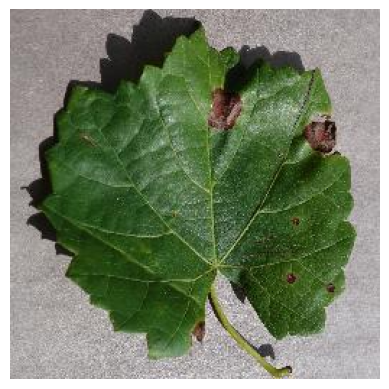

In [35]:
img = np.array(Image.open("../leaves/images/Grape_Black_rot/image (11).JPG", "r"))
plt.imshow(img)
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 26ms/step


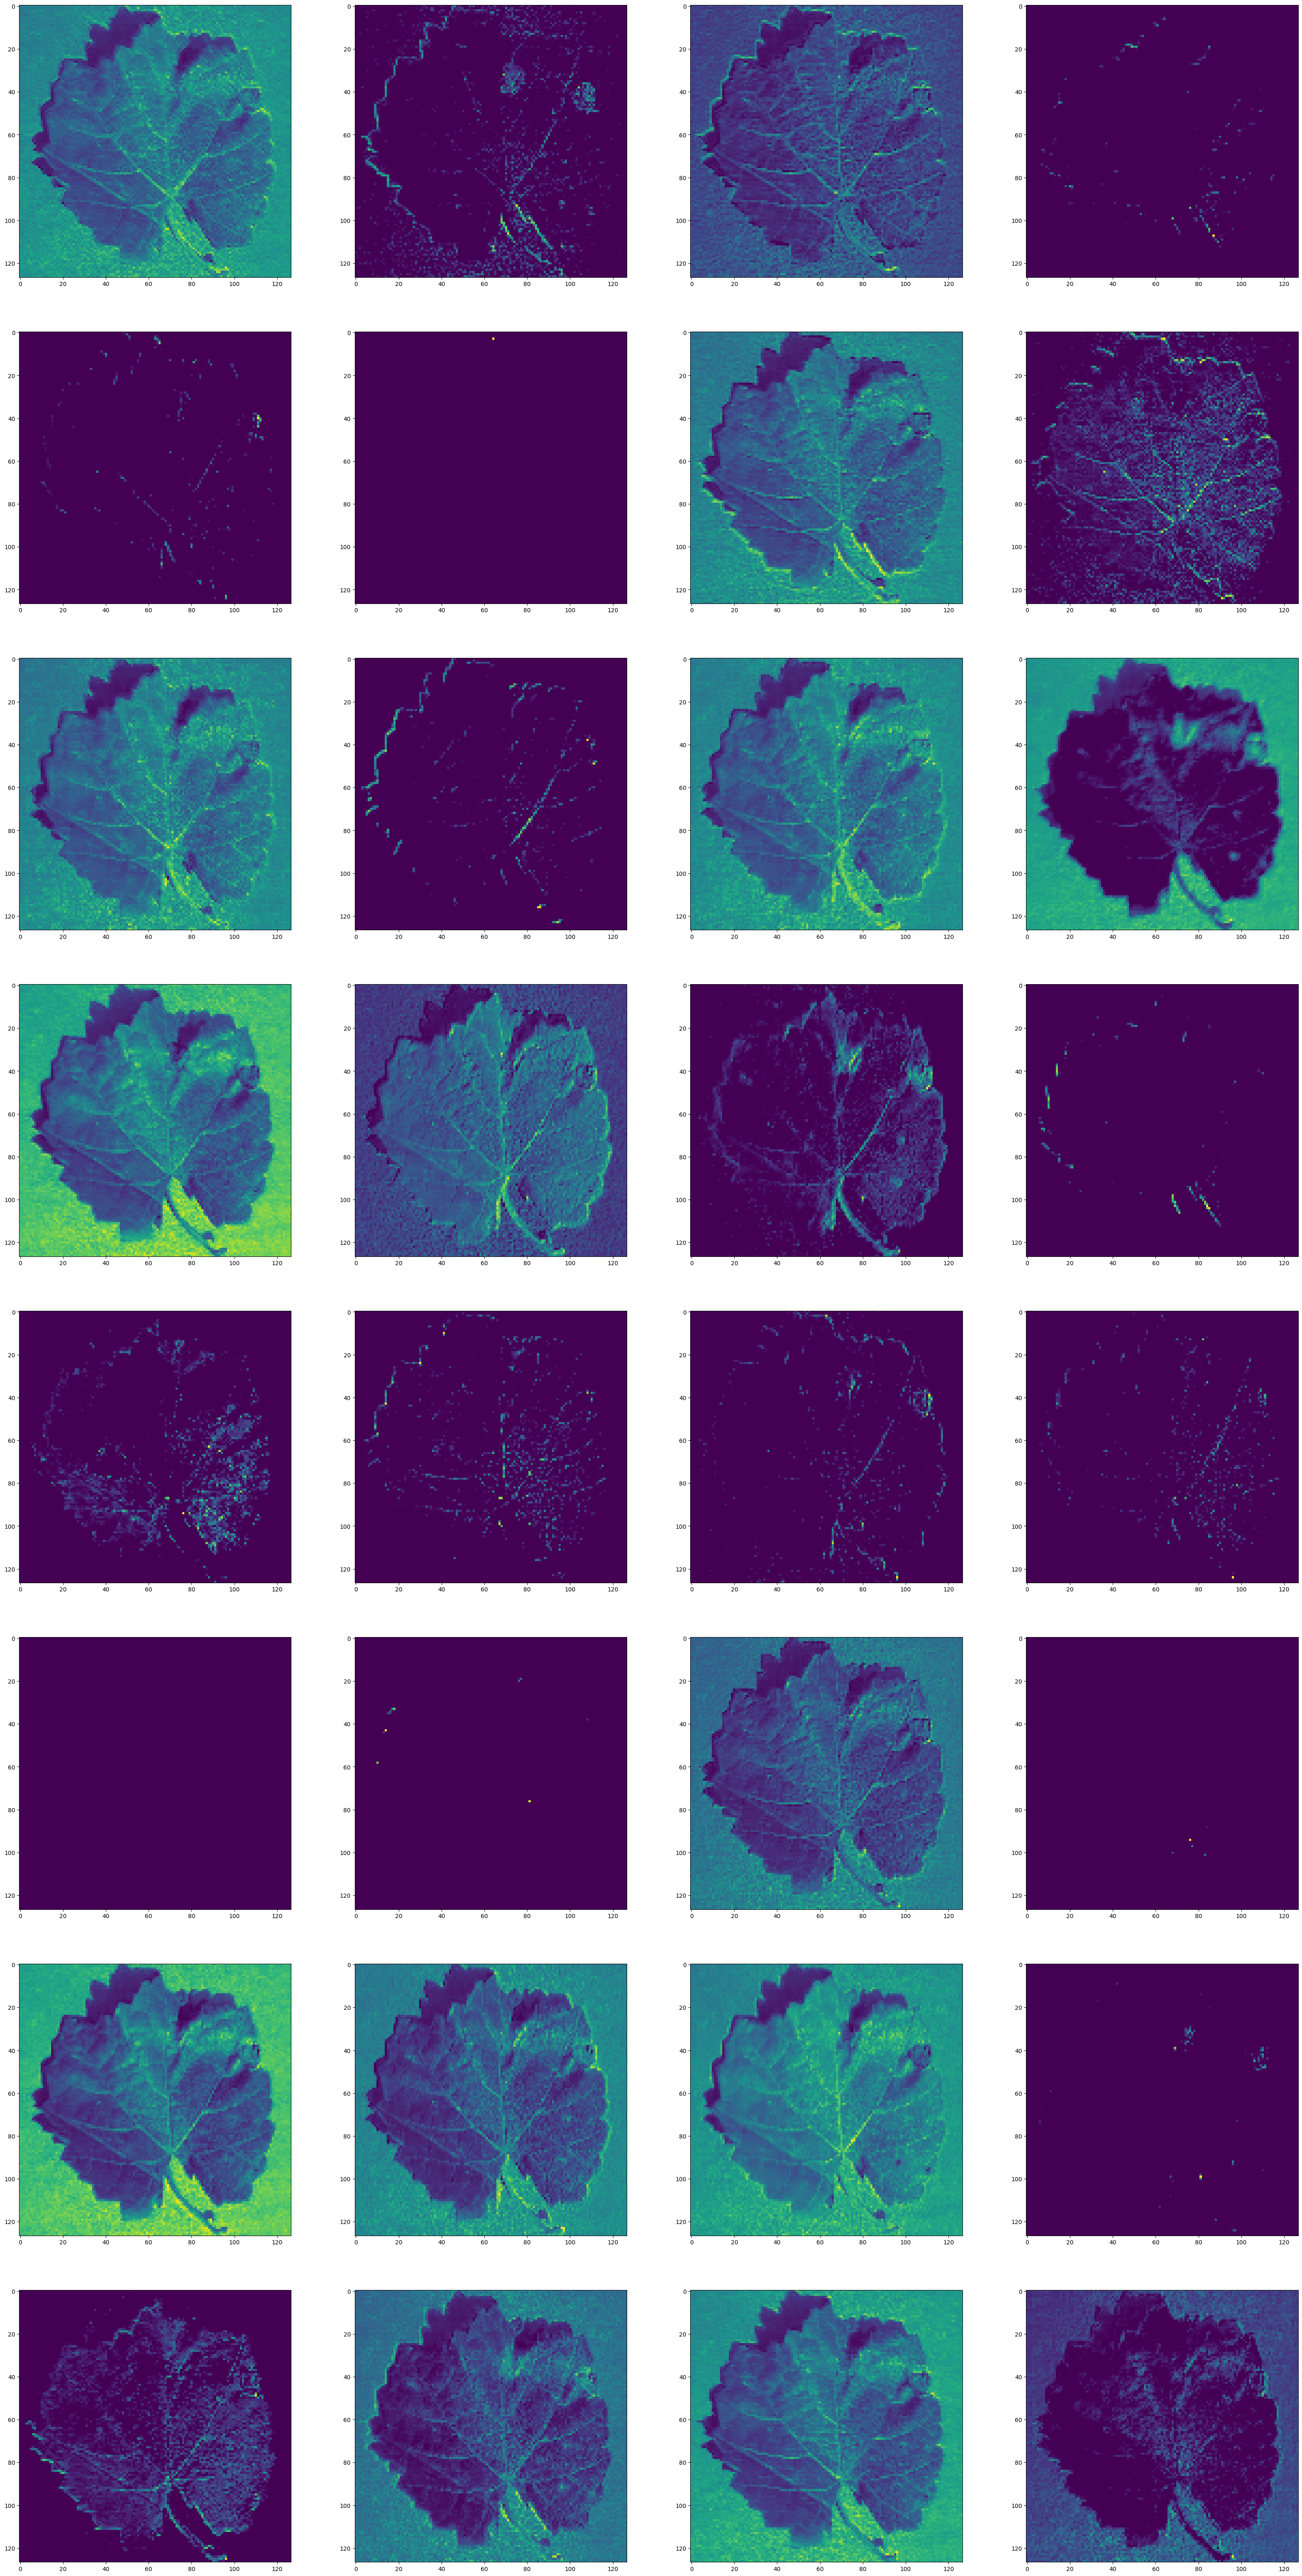

In [36]:
printFiltersImg(model, 1, img)

In [2]:
os.remove('model_param.keras')